In [74]:
# import library
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#### 1) load hand writtern digit dataset which has 60000 train dataset and 10000 test dataset

In [75]:
# load hand writtern digit dataset which has 60000 train dataset and 10000 test dataset
(X_train,y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [76]:
len(X_train)

60000

In [77]:
len(X_test)

10000

In [78]:
X_test[0].shape

(28, 28)

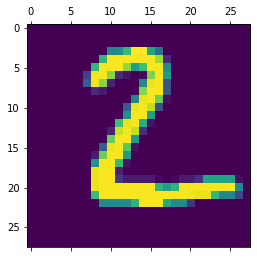

In [79]:
plt.matshow(X_test[1])

In [80]:
y_train[2]

4

In [81]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [82]:
X_train.shape

(60000, 28, 28)

#### 2 ) Scale dataset to imporve the accuracy

In [83]:
X_train = X_train / 255
X_test = X_test / 255

In [84]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### 3 ) Flattent the array, from two dimensional to single dimensional

In [85]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_train_flatten.shape

(60000, 784)

In [86]:
X_test_flatten = X_test.reshape(len(X_test), 28*28)
X_test_flatten.shape

(10000, 784)

#### 4 ) Build model without hidden value and train it

In [87]:
model = keras.Sequential([
        keras.layers.Dense(10, input_shape = (784,),activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4894 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3061 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2853 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2748 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2682 - accuracy: 0.9262


#### 5 ) Evaluvate the model using test dataset

In [88]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 951us/step - loss: 0.2655 - accuracy: 0.9262


[0.26551660895347595, 0.9261999726295471]

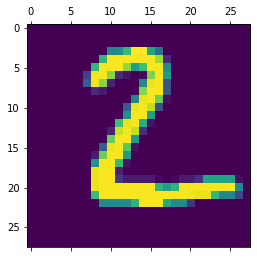

In [89]:
plt.matshow(X_test[1])

In [90]:
y_predicted = model.predict(X_test_flatten)
y_predicted[1]

array([2.4873018e-04, 1.2829346e-06, 3.2884386e-01, 1.4990568e-04,
       9.0231831e-14, 1.9048154e-03, 2.0855665e-03, 1.7330789e-16,
       5.4010961e-05, 2.3974827e-13], dtype=float32)

In [91]:
np.argmax(y_predicted[1])

2

#### 6 ) Verify the model performance/acuracy using confusion matrix

In [92]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [93]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [94]:
#confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    5,    8,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   4,   12,  916,   19,   10,    5,   14,   10,   39,    3],
       [   4,    0,   15,  917,    1,   31,    3,   10,   21,    8],
       [   1,    2,    3,    1,  923,    0,   10,    4,    9,   29],
       [  10,    2,    2,   22,    9,  798,   14,    3,   27,    5],
       [   8,    3,    4,    1,    7,   13,  920,    0,    2,    0],
       [   1,    9,   22,    9,    9,    1,    0,  937,    4,   36],
       [   6,   12,    5,   19,    9,   36,    8,   10,  862,    7],
       [   9,    8,    1,   10,   36,    9,    1,   18,    7,  910]],
      dtype=int32)>

Text(69.0, 0.5, 'truth')

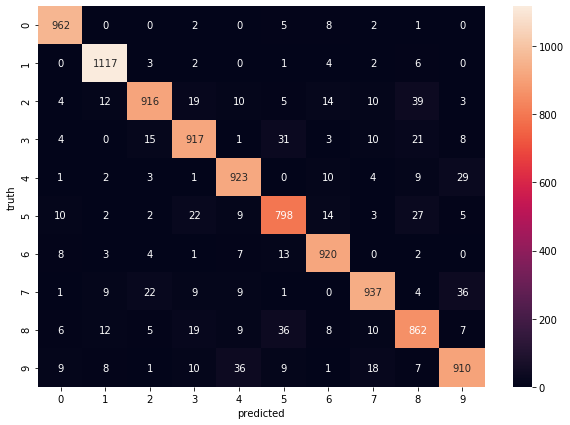

In [95]:
#plot the confusion matrix result in better visualization
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

#### 7) Build model with hidden layer

In [96]:
model = keras.Sequential([
        keras.layers.Dense(100, input_shape = (784,),activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2980 - accuracy: 0.9174
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1420 - accuracy: 0.9586
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0999 - accuracy: 0.9699
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0765 - accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0612 - accuracy: 0.9815


#### 8 ) Evaluvate the model using test dataset

In [97]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0862 - accuracy: 0.9732


[0.08619553595781326, 0.9732000231742859]

#### 9 ) Verify the model performance/acuracy using confusion matrix

Text(69.0, 0.5, 'truth')

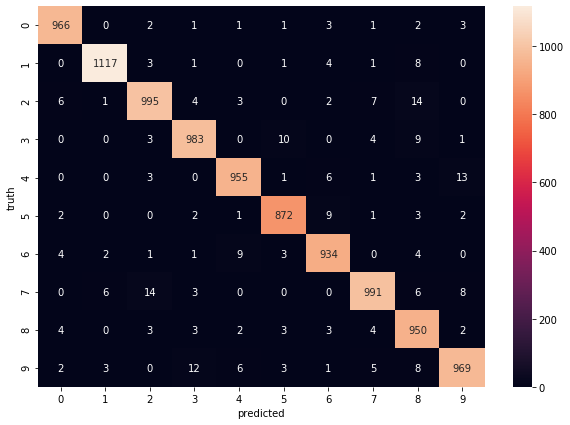

In [99]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

#confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_predicted_labels)

#plot the confusion matrix result in better visualization
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

#### 10) Use flatten function from keras

In [102]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2948 - accuracy: 0.9194
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1385 - accuracy: 0.9601
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0974 - accuracy: 0.9710: 0s - loss: 0.0976 - accuracy: 
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0773 - accuracy: 0.9771
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0628 - accuracy: 0.9816
